<a href="https://colab.research.google.com/github/obeshor/DataLit/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Twitter API
Sentiment Analysis is  a technique that involves building systems that can indentify and extract opinions from Text. It's a common NLP task that Data Scientists need to perform.
In this Lab, we are going to build a sentiment analyser in few lines of python using twitter API and the vader python framework.

In [1]:
!pip install pandas
!pip install tweepy
!pip install vaderSentiment

In [2]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
#Your Twitter API Authentication Variables
consumer_key = 'your consumer key'
consumer_secret = 'your consumer secret'
access_token = 'your access_token'
access_token_secret = 'your access token secret'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweets = api.search('racist', count=1000) #Search Tweets about racist


data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head(10))


print(tweets[0].created_at)


,Tweets
0,RT @ialika_lifina: This is messed up.\nThis is...
1,RT @VestsCanada: On May 4 a bunch of racists a...
2,RT @AJentleson: Senator Hirono made the choice...
3,RT @btsoutsoldyall: Btches we going bts lockdo...
4,RT @tiadanaee: White people dont get arrested ...
5,@PaulbernalUK @OwenJones84 But knowing his wor...
6,RT @tiadanaee: White people dont get arrested ...
7,RT @fearnoMAGAt: Jeff Sessions is a racist pie...
8,RT @tiadanaee: White people dont get arrested ...
9,@lauferlaw @medit8now Democrats will pull a Su...


2019-05-01 22:56:07


In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
sid = SentimentIntensityAnalyzer()


listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.Series(listy)
data['polarity'] = se.values

display(data.head(100))

,Tweets,polarity
0,RT @ialika_lifina: This is messed up.\nThis is...,"{'neg': 0.343, 'neu': 0.593, 'pos': 0.064, 'co..."
1,RT @VestsCanada: On May 4 a bunch of racists a...,"{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'comp..."
2,RT @AJentleson: Senator Hirono made the choice...,"{'neg': 0.086, 'neu': 0.914, 'pos': 0.0, 'comp..."
3,RT @btsoutsoldyall: Btches we going bts lockdo...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp..."
4,RT @tiadanaee: White people dont get arrested ...,"{'neg': 0.103, 'neu': 0.833, 'pos': 0.064, 'co..."
5,@PaulbernalUK @OwenJones84 But knowing his wor...,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound..."
6,RT @tiadanaee: White people dont get arrested ...,"{'neg': 0.103, 'neu': 0.833, 'pos': 0.064, 'co..."
7,RT @fearnoMAGAt: Jeff Sessions is a racist pie...,"{'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'comp..."
8,RT @tiadanaee: White people dont get arrested ...,"{'neg': 0.103, 'neu': 0.833, 'pos': 0.064, 'co..."
9,@lauferlaw @medit8now Democrats will pull a Su...,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp..."


In [0]:
tweets=pd.DataFrame()

tweets["neg"]=[(sid.polarity_scores(i)['neg']) for i in data['Tweets']]
tweets["neu"]=[(sid.polarity_scores(i)['neu']) for i in data['Tweets']]
tweets["pos"]=[(sid.polarity_scores(i)['pos']) for i in data['Tweets']]
tweets["compound"]=[(sid.polarity_scores(i)['compound']) for i in data['Tweets']]

pos=0
neg=0
neu=0

##print(tweets["compound"])
for compound in tweets["compound"]:
  if compound >= 0.5:
    pos+=1
  elif compound <= -0.5:
    neg+=1
  else:
    neu+=1
    


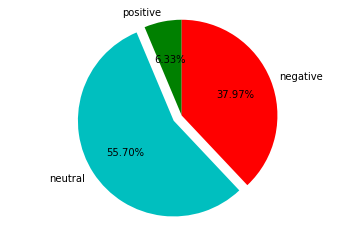

In [8]:
import matplotlib.pyplot as plt

labels = 'positive', 'neutral', 'negative'
sections = [pos, neu, neg]
colors = ['g', 'c', 'r']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Sentiment of tweets about  "racist"')
plt.title('')
plt.show()